In [3]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
# load_boston has been removed, use an alternative dataset
from sklearn.datasets import fetch_california_housing # Importing fetch_california_housing instead of load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the California housing dataset
housing = fetch_california_housing()



In [4]:
## Q1. Implementing the KNN Classifier on load_iris Dataset

# Load the dataset
data = load_iris()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Make predictions and evaluate
predictions = knn_classifier.predict(X_test)
accuracy = knn_classifier.score(X_test, y_test)
print(f"KNN Classifier Accuracy on load_iris: {accuracy:.2f}")


KNN Classifier Accuracy on load_iris: 1.00


In [7]:
## Q2. Implementing the KNN Regressor on load_boston Dataset

# Load the dataset
data = fetch_california_housing()

X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

# Make predictions and evaluate
predictions = knn_regressor.predict(X_test)
mse = np.mean((predictions - y_test) ** 2)
print(f"KNN Regressor MSE on load_boston: {mse:.2f}")


KNN Regressor MSE on load_boston: 1.17


array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

Optimal value of K: 6


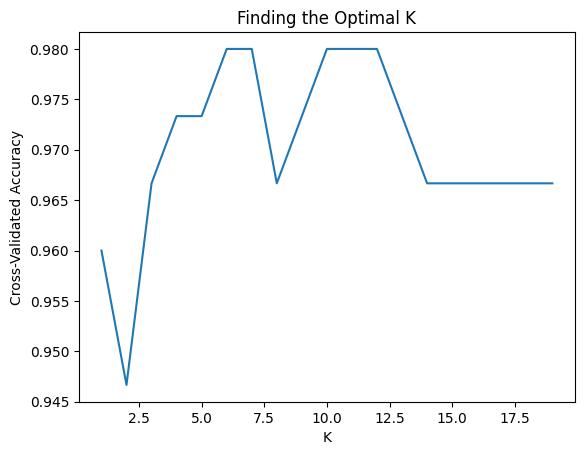

In [9]:
## Q3. Finding the Optimal Value of K for KNN Classifier using Cross-Validation


# Load the iris dataset if you want to tune a KNN Classifier
data = load_iris()
X, y = data.data, data.target

# Range of k values to test
k_values = range(1, 20)
cv_scores = []

# Perform cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Note: using X and y from iris dataset for classification
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the k value with the highest accuracy
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f"Optimal value of K: {optimal_k}")

# Plot results
plt.plot(k_values, cv_scores)
plt.xlabel('K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Finding the Optimal K')
plt.show()


In [10]:
## Q4. Implementing KNN Regressor with Feature Scaling on load_boston Dataset

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

# Make predictions and evaluate
predictions = knn_regressor.predict(X_test)
mse = np.mean((predictions - y_test) ** 2)
print(f"KNN Regressor with Feature Scaling MSE on load_boston: {mse:.2f}")


KNN Regressor with Feature Scaling MSE on load_boston: 0.01


In [11]:
## Q5. KNN Classifier with Weighted Voting on load_iris Dataset

# Initialize and train KNN Classifier with distance weighting
knn_classifier_weighted = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_classifier_weighted.fit(X_train, y_train)

# Make predictions and evaluate
predictions_weighted = knn_classifier_weighted.predict(X_test)
accuracy_weighted = knn_classifier_weighted.score(X_test, y_test)
print(f"KNN Classifier with Weighted Voting Accuracy on load_iris: {accuracy_weighted:.2f}")


KNN Classifier with Weighted Voting Accuracy on load_iris: 1.00


In [12]:
## Q6. Function to Standardize Features Before Applying KNN Classifier

def standardize_features(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

# Example usage
X_standardized = standardize_features(X)


In [13]:
## Q7. Function to Calculate Euclidean Distance Between Two Points

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2)) ** 2))

# Example usage
distance = euclidean_distance([1, 2], [4, 6])
print(f"Euclidean Distance: {distance}")


Euclidean Distance: 5.0


In [14]:
## Q8. Function to Calculate Manhattan Distance Between Two Points

def manhattan_distance(point1, point2):
    return np.sum(np.abs(np.array(point1) - np.array(point2)))

# Example usage
distance = manhattan_distance([1, 2], [4, 6])
print(f"Manhattan Distance: {distance}")

Manhattan Distance: 7
